# Portfolio Optimization

Download the JSE Top 40 Closing Prices excel file from RUconnected and paste in the same directory as this notebook.  Import that excel file and store it as a DataFrame called `df`.

Using the list below, select the stocks that have been chosen for you and store it as a DataFrame called `prices`:

- 18S0848:[JSE:SLM,JSE:INL,JSE:MTN,JSE:NPH,JSE:GRT,JSE:SAP,JSE:RES,JSE:REM,JSE:IMP,JSE:AMS]
- 18K5600:[JSE:TCP,JSE:MRP,JSE:SBK,JSE:EXX,JSE:CLS,JSE:GRT,JSE:AMS,JSE:TBS,JSE:MTN,JSE:DSY]
- 19M8491:[JSE:GFI,JSE:APN,JSE:GRT,JSE:CPI,JSE:BVT,JSE:WHL,JSE:RES,JSE:TCP,JSE:NED,JSE:DSY]
- 23M8732:[JSE:FSR,JSE:REM,JSE:APN,JSE:NED,JSE:TCP,JSE:GRT,JSE:GFI,JSE:SHP,JSE:MTN,JSE:DSY]
- 23M4785:[JSE:GFI,JSE:TRU,JSE:CLS,JSE:MRP,JSE:TCP,JSE:MTN,JSE:BTI,JSE:SOL,JSE:NPN,JSE:DSY]
- 17B5426:[JSE:ANG,JSE:AMS,JSE:SBK,JSE:SHP,JSE:INL,JSE:KIO,JSE:BTI,JSE:RDF,JSE:RES,JSE:EXX]
- 23R7256:[JSE:IMP,JSE:LHC,JSE:SHP,JSE:BVT,JSE:GLN,JSE:BTI,JSE:EXX,JSE:NPN,JSE:CLS,JSE:AMS]

Ensure that the `prices` DataFrame only contains records from 2022.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.optimize as sco


In [42]:
df = pd.read_excel("JSE Top 40 Closing Prices (1-1-2017 to 30-12-2022).xlsx")
df

,Date,JSE:ABG,JSE:AMS,JSE:ANG,JSE:APN,JSE:BTI,JSE:BVT,JSE:CLS,JSE:CPI,JSE:DCP,...,JSE:RES,JSE:SAP,JSE:SBK,JSE:SHP,JSE:SLM,JSE:SOL,JSE:TBS,JSE:TCP,JSE:TRU,JSE:WHL
0,03/01/2017,17000,27672,15093,28208,77975.0,17997,11746.0,69300,2235,...,11272,8900,15260,17295,6383,40657,39434,1375,8026,7184
1,04/01/2017,17170,28202,15339,28278,77050.0,17792,11450.0,68850,2212,...,11543,8842,15155,16901,6496,40440,39069,1376,8000,7090
2,05/01/2017,16680,29250,15900,27500,76825.0,17300,11249.0,69000,2209,...,11417,8800,14901,16840,6373,39950,39255,1421,7745,6909
3,06/01/2017,16950,28961,16030,27533,77096.0,17230,11344.0,68964,2175,...,11460,8845,15038,16733,6451,40360,39737,1391,7683,6977
4,09/01/2017,16967,28170,15614,27500,77466.0,17352,11423.0,68791,2201,...,11600,8800,15158,16850,6466,40102,39761,1389,7663,6894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,22/12/2022,19532,145055,33190,13733,68813.0,22011,28357.0,188516,2920,...,5314,4920,17295,23495,4835,27066,21500,3300,5649,6736
1496,23/12/2022,19700,145176,33936,14008,68670.0,22175,28044.0,189921,2910,...,5418,4940,17365,23531,4930,27400,21500,3327,5657,6767
1497,28/12/2022,19600,149617,33657,13597,69225.0,21885,28194.0,189257,2913,...,5417,5000,17115,23167,4846,27447,21279,3305,5681,6732
1498,29/12/2022,19420,145498,33728,13634,67748.0,21507,27930.0,186967,2878,...,5356,4950,16900,22834,4873,26974,20956,3290,5627,6691


In [43]:
price = df.loc[1250:, ['JSE:GFI','JSE:APN','JSE:GRT','JSE:CPI','JSE:BVT','JSE:WHL','JSE:RES','JSE:TCP','JSE:NED','JSE:DSY']]
price

,JSE:GFI,JSE:APN,JSE:GRT,JSE:CPI,JSE:BVT,JSE:WHL,JSE:RES,JSE:TCP,JSE:NED,JSE:DSY
1250,17120,21982,1549,203508,19076,5206,6000,4655,17843,14459
1251,17111,23349,1551,206000,19000,5239,6001,4750,18033,14669
1252,17068,23303,1550,208858,18990,5239,6136,4770,18595,14924
1253,15816,22680,1539,212826,18912,5217,6208,4852,18469,14737
1254,15753,22360,1513,213082,18960,5230,6089,4908,18500,14797
...,...,...,...,...,...,...,...,...,...,...
1495,18150,13733,1438,188516,22011,6736,5314,3300,21221,12393
1496,18525,14008,1477,189921,22175,6767,5418,3327,21482,12415
1497,18328,13597,1473,189257,21885,6732,5417,3305,21315,12397
1498,18443,13634,1459,186967,21507,6691,5356,3290,21277,12293


Calculate the variance covariance matrix and call it `vcm`.  Plot `vcm` as a `heatmap` using the `Seaborn` library.  Use as many cells as needed.

In [44]:
vcm = price.cov()
vcm

,JSE:GFI,JSE:APN,JSE:GRT,JSE:CPI,JSE:BVT,JSE:WHL,JSE:RES,JSE:TCP,JSE:NED,JSE:DSY
JSE:GFI,8.830335e+06,3.546488e+06,91665.043181,2.250311e+07,7.683237e+05,1.834203e+04,4.755581e+05,7.775518e+05,1.557623e+06,4.346356e+06
JSE:APN,3.546488e+06,7.439940e+06,137677.971213,2.224910e+07,-1.299183e+06,-6.945134e+05,8.049947e+05,1.003108e+06,-8.235788e+05,4.254174e+06
JSE:GRT,9.166504e+04,1.376780e+05,5816.561221,6.634461e+05,-6.651355e+03,-5.002998e+03,1.889399e+04,1.874546e+04,4.716566e+03,9.375697e+04
JSE:CPI,2.250311e+07,2.224910e+07,663446.082763,2.296652e+08,2.360444e+06,-3.799385e+06,3.911956e+06,4.841339e+06,7.354150e+06,2.514588e+07
JSE:BVT,7.683237e+05,-1.299183e+06,-6651.355277,2.360444e+06,1.174879e+06,2.432874e+05,-6.993530e+04,-1.220894e+05,1.073013e+06,-2.612427e+04
JSE:WHL,1.834203e+04,-6.945134e+05,-5002.997655,-3.799385e+06,2.432874e+05,2.809006e+05,-1.100532e+05,-1.028785e+05,1.655295e+05,-4.996413e+05
JSE:RES,4.755581e+05,8.049947e+05,18893.987052,3.911956e+06,-6.993530e+04,-1.100532e+05,1.209328e+05,1.178009e+05,-1.860872e+04,5.903205e+05
JSE:TCP,7.775518e+05,1.003108e+06,18745.460498,4.841339e+06,-1.220894e+05,-1.028785e+05,1.178009e+05,2.212226e+05,4.387519e+04,7.731749e+05
JSE:NED,1.557623e+06,-8.235788e+05,4716.566426,7.354150e+06,1.073013e+06,1.655295e+05,-1.860872e+04,4.387519e+04,1.546963e+06,6.888232e+05
JSE:DSY,4.346356e+06,4.254174e+06,93756.967582,2.514588e+07,-2.612427e+04,-4.996413e+05,5.903205e+05,7.731749e+05,6.888232e+05,4.093754e+06


<Axes: >

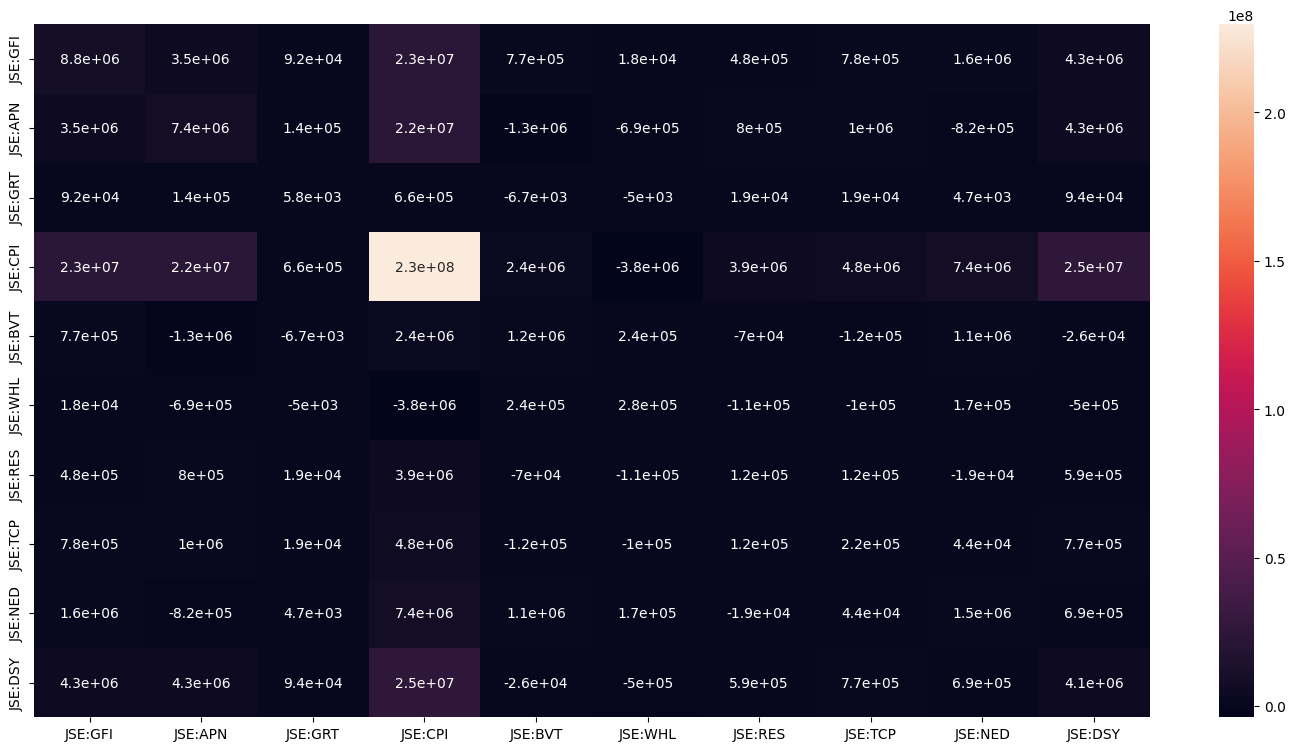

In [45]:
plt.figure(figsize=(18,9))
sns.heatmap(data=vcm, annot=True)


<Axes: >

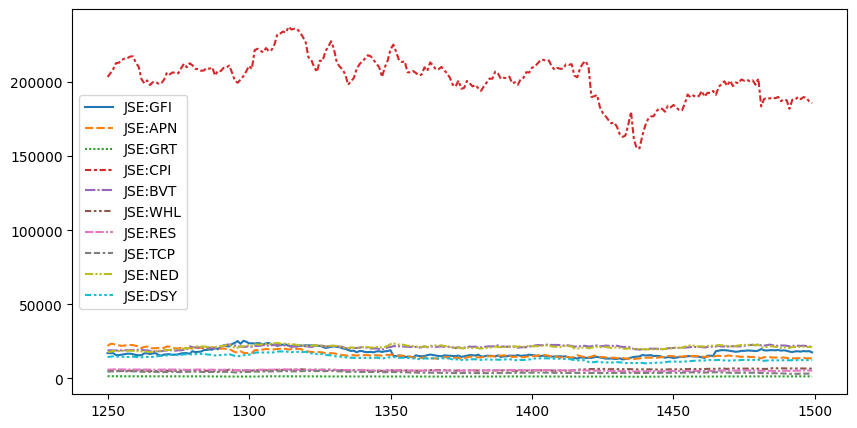

In [46]:
plt.figure(figsize=(10,5))
sns.lineplot(data=price)

<Axes: >

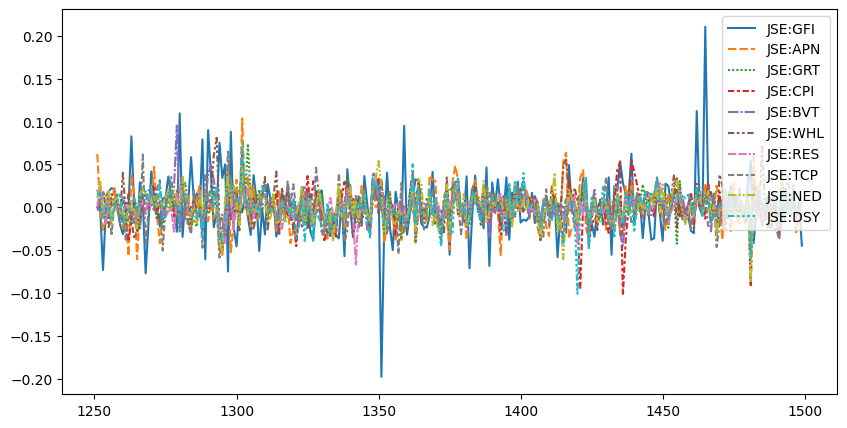

In [47]:
plt.figure(figsize=(10,5))
returns = price/price.shift(1) -1
sns.lineplot(data=returns)

In [48]:
mean_returns = returns.mean()
mean_returns

JSE:GFI    0.000744
JSE:APN   -0.001641
JSE:GRT   -0.000136
JSE:CPI   -0.000162
JSE:BVT    0.000601
JSE:WHL    0.001157
JSE:RES   -0.000365
JSE:TCP   -0.001154
JSE:NED    0.000864
JSE:DSY   -0.000464
dtype: float64

In [49]:
st_dev = returns.std()
st_dev


JSE:GFI    0.035636
JSE:APN    0.023566
JSE:GRT    0.015386
JSE:CPI    0.020011
JSE:BVT    0.016342
JSE:WHL    0.018976
JSE:RES    0.012369
JSE:TCP    0.020742
JSE:NED    0.017920
JSE:DSY    0.018596
dtype: float64

In [50]:
sharpe_ratio = mean_returns/st_dev
sharpe_ratio


JSE:GFI    0.020870
JSE:APN   -0.069646
JSE:GRT   -0.008866
JSE:CPI   -0.008073
JSE:BVT    0.036782
JSE:WHL    0.060980
JSE:RES   -0.029499
JSE:TCP   -0.055631
JSE:NED    0.048234
JSE:DSY   -0.024952
dtype: float64

In [51]:
cov_matrix = returns.cov()
cov_matrix

,JSE:GFI,JSE:APN,JSE:GRT,JSE:CPI,JSE:BVT,JSE:WHL,JSE:RES,JSE:TCP,JSE:NED,JSE:DSY
JSE:GFI,0.001270,0.000036,-0.000033,-0.000010,-0.000009,-0.000045,-0.000002,-0.000011,-0.000013,0.000033
JSE:APN,0.000036,0.000555,0.000149,0.000160,0.000110,0.000139,0.000072,0.000122,0.000147,0.000168
JSE:GRT,-0.000033,0.000149,0.000237,0.000101,0.000116,0.000119,0.000118,0.000092,0.000132,0.000127
JSE:CPI,-0.000010,0.000160,0.000101,0.000400,0.000141,0.000111,0.000067,0.000122,0.000185,0.000194
JSE:BVT,-0.000009,0.000110,0.000116,0.000141,0.000267,0.000141,0.000074,0.000132,0.000161,0.000156
JSE:WHL,-0.000045,0.000139,0.000119,0.000111,0.000141,0.000360,0.000066,0.000107,0.000128,0.000112
JSE:RES,-0.000002,0.000072,0.000118,0.000067,0.000074,0.000066,0.000153,0.000075,0.000085,0.000107
JSE:TCP,-0.000011,0.000122,0.000092,0.000122,0.000132,0.000107,0.000075,0.000430,0.000170,0.000171
JSE:NED,-0.000013,0.000147,0.000132,0.000185,0.000161,0.000128,0.000085,0.000170,0.000321,0.000210
JSE:DSY,0.000033,0.000168,0.000127,0.000194,0.000156,0.000112,0.000107,0.000171,0.000210,0.000346


<Axes: >

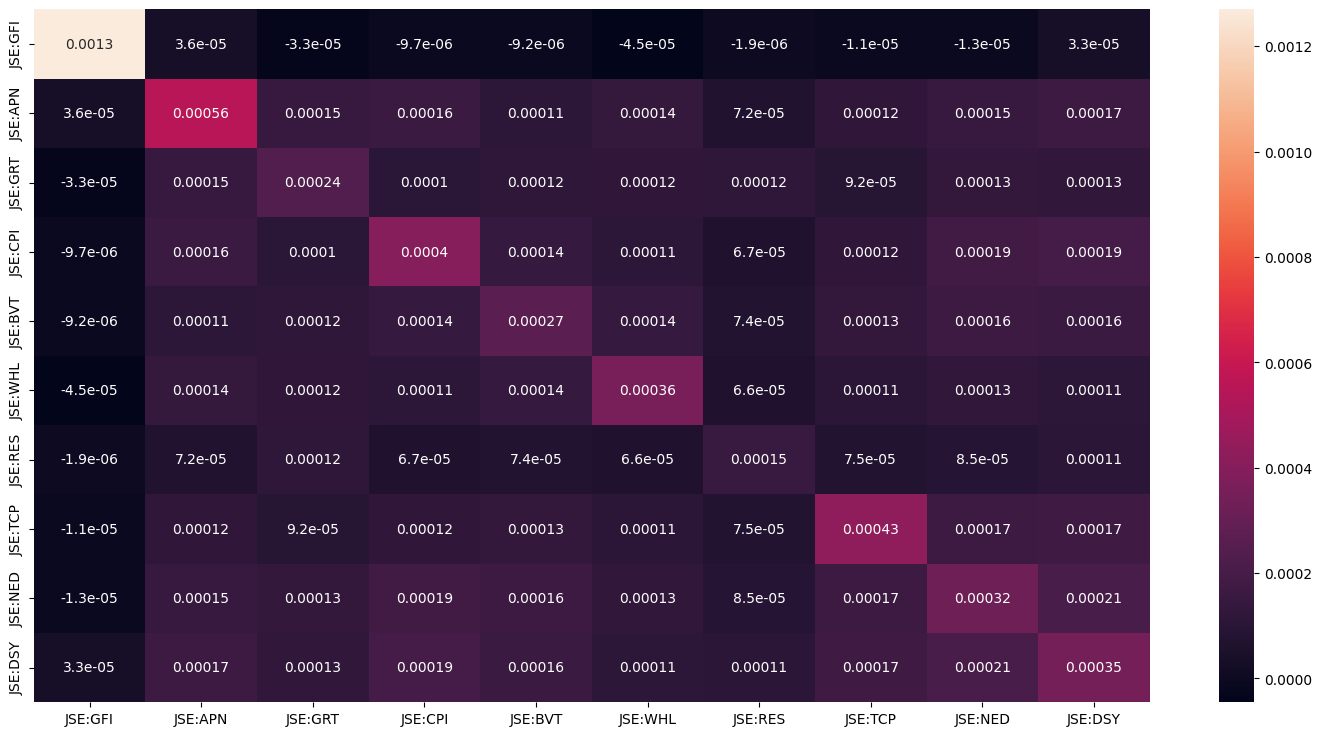

In [52]:
plt.figure(figsize=(18,9))

sns.heatmap(cov_matrix,annot=True)

Calculate the optimal weights, portfolio return, portfolio standard deviation and portfolio Sharpe ratio of the Maximum Sharpe Ratio portfolio.  Store the variables as `msr_weights`, `msr_return`, `msr_std` and `msr_sr` respectively. Use as many cells as needed.

## Max Sharpe Ratio Portfolio

In [53]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(mean_returns*weights)
    portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_std_dev = np.sqrt(portfolio_var)
    sharpe_ratio = portfolio_return/portfolio_std_dev
    return -sharpe_ratio 

In [ ]:
#constraints
def weight_constraint(weights):
    return np.sum(weights) - 1
def individual_weight_constraint(weights):
    return weights


Calculate the optimal weights, portfolio return, portfolio standard deviation and portfolio Sharpe ratio of the Minimum Variance portfolio.  Store the variables as `mv_weights`, `mv_return`, `mv_std` and `mv_sr` respectively. Use as many cells as needed.

Calculate the optimal weights, portfolio return, portfolio standard deviation and portfolio Sharpe ratio of the Risk portfolio.  Store the variables as `rp_weights`, `rp_return`, `rp_std` and `rp_sr` respectively. Use as many cells as needed.

Determine if the Risk Parity portfolio is infact optimized by estimating the Mean Variance Optimisation portfolio where the portfolio variance needs to equal that of the Risk Parity portfolio.  